<a href="https://colab.research.google.com/github/pressnaveK/Basic_Pylib/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Loading and resizing Cifar10 data model

In [2]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

### Difining labels as cifar10 labels

In [9]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Validating whether the dataset does correct

In [14]:
def plotingSample(X,Y,i,title):
  plt.figure(figsize=(1,1))
  plt.imshow(X[i])
  plt.xlabel(classes[Y[i]])
  plt.title(title)


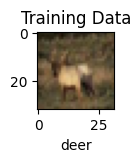

In [11]:
plotingSample(x_train,y_train,3,"Training Data")

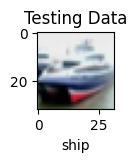

In [12]:
plotingSample(x_test,y_test,1,"Testing Data")

# Trainning

### Normalizing


> In Cifar10 data set , the images are extracted as numpy array by using openCV. OpenCV defines each pixel as three RGB channels in range of 0 - 255. To normalize the image sets, each value of the matrix should be divided by 255.





In [13]:
x_train = x_train / 255
x_test = x_test/255

### Diffining ANN Layers

In [14]:
x_train[0].shape

(32, 32, 3)


> The trainning data set contains **32 X 32 pixels** of images with **three RGB channels**. Therefore the input layer should be **flatten 32,32,3 shaped layer**.


> There are **10 labels** in the trainning data set therefore output layers should be contained **10 neurons**. for better performance , the activation function should be **sigmoid**.



> The activation function of hidden layers should be **relu**.

### Create Artificial Neural Networt and Train the model







In [15]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(2000,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid'),

])

ANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
ANNhistory = ANN.fit(x_train,y_train, epochs = 30 )

Epoch 1/30
1563/1563 [==============================] - 113s 72ms/step - loss: 1.8108 - accuracy: 0.3562
Epoch 2/30
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6201 - accuracy: 0.4289
Epoch 3/30
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5385 - accuracy: 0.4583
Epoch 4/30
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4794 - accuracy: 0.4790
Epoch 5/30
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4299 - accuracy: 0.4970
Epoch 6/30
1563/1563 [==============================] - 106s 68ms/step - loss: 1.3862 - accuracy: 0.5148
Epoch 7/30
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3442 - accuracy: 0.5286
Epoch 8/30
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3080 - accuracy: 0.5419
Epoch 9/30
1563/1563 [==============================] - 100s 64ms/step - loss: 1.2768 - accuracy: 0.5511
Epoch 10/30
1563/1563 [==============================] 



> Accuracy of ANN model is 0.7599 which is the lowest for 30 epochs. It took 102 seconds for each epoch that performance is bad. we have to increse hidden layers and their neurons and epochs to increase accuracy of this model. Therefore , the trainning is tried in Convolution Neural Network.
### Create Convolution Neural Network and Train the Model



In [16]:
CNN = models.Sequential([
    #Convolution Layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),


    #Dense Layers
    layers.Flatten(),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(10,activation = 'softmax'),

])
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
CNNhistory = CNN.fit(x_train,y_train, epochs = 30 )

Epoch 1/30
1563/1563 [==============================] - 78s 49ms/step - loss: 1.4589 - accuracy: 0.4678
Epoch 2/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0683 - accuracy: 0.6232
Epoch 3/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9023 - accuracy: 0.6850
Epoch 4/30
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7923 - accuracy: 0.7235
Epoch 5/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7000 - accuracy: 0.7551
Epoch 6/30
1563/1563 [==============================] - 76s 48ms/step - loss: 0.6270 - accuracy: 0.7810
Epoch 7/30
1563/1563 [==============================] - 76s 48ms/step - loss: 0.5648 - accuracy: 0.8037
Epoch 8/30
1563/1563 [==============================] - 76s 48ms/step - loss: 0.5088 - accuracy: 0.8214
Epoch 9/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4548 - accuracy: 0.8396
Epoch 10/30
1563/1563 [==============================] - 76s 48m

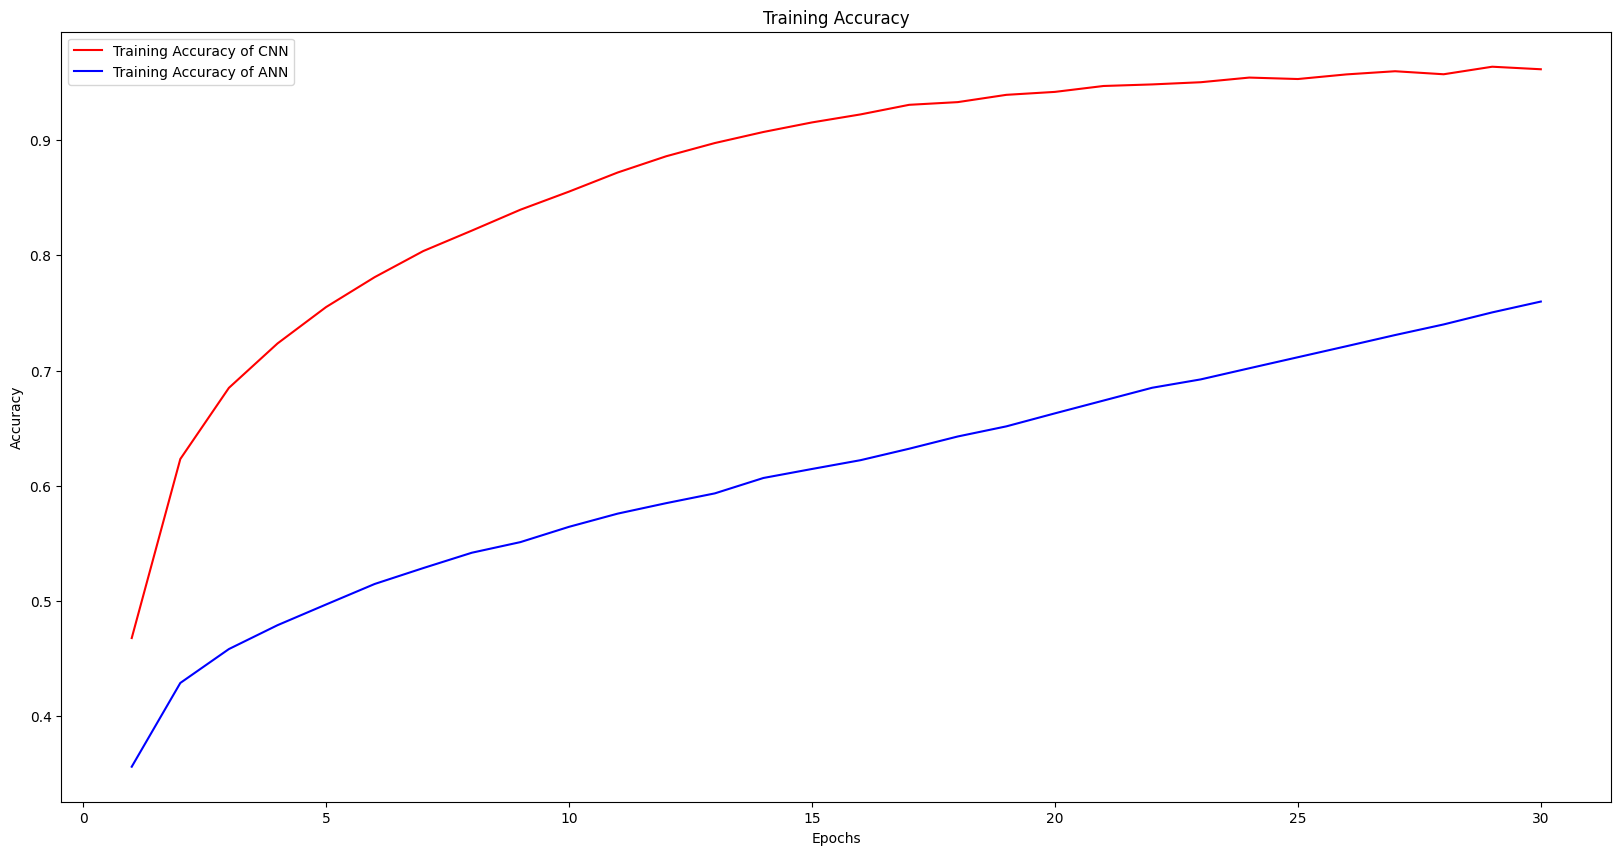

In [17]:
accuracyCNN = CNNhistory.history['accuracy']
accuracyANN = ANNhistory.history['accuracy']
epochs = range(1, len(accuracyCNN) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs,accuracyCNN,'r',label = 'Training Accuracy of CNN')
plt.plot(epochs,accuracyANN,'b',label = 'Training Accuracy of ANN')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
CNN.save('trained_CNN.h5')

In [19]:
ANN.save('trained_ANN.h5')

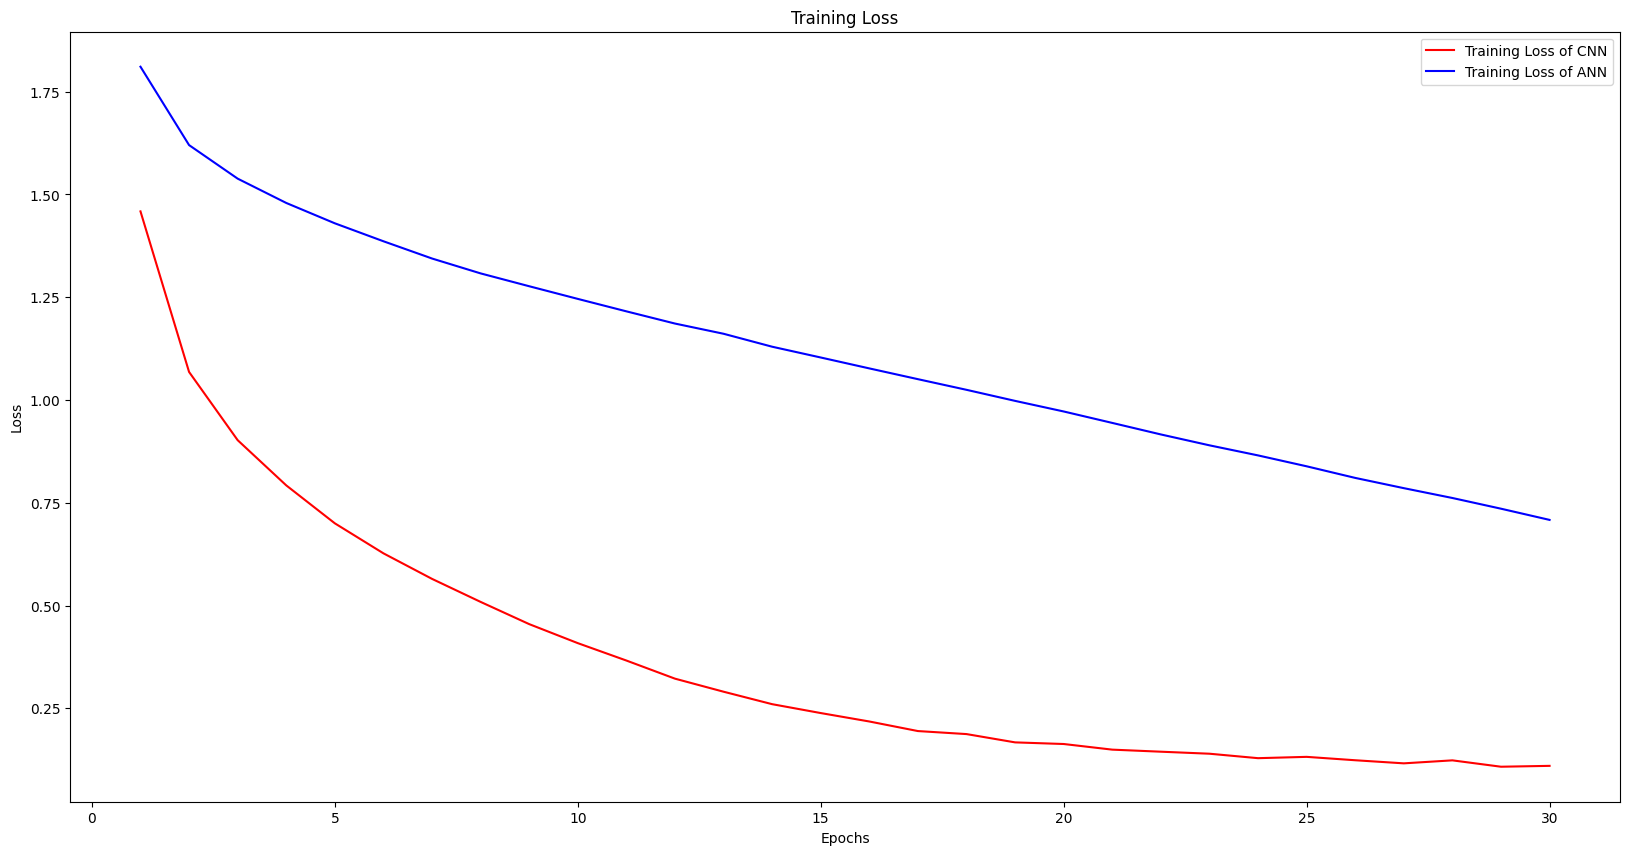

In [20]:
lossCNN = CNNhistory.history['loss']
lossANN = ANNhistory.history['loss']
epochs = range(1, len(lossCNN) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs,lossCNN,'r',label = 'Training Loss of CNN')
plt.plot(epochs,lossANN,'b',label = 'Training Loss of ANN')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
from tensorflow.keras.models import load_model
CNN_model = load_model('trained_CNN.h5')

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()


classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [8]:
CNN_model.evaluate(x_test,y_test)

1563/1563 [==============================] - 34s 22ms/step - loss: 336.2529 - accuracy: 0.6616


[336.25286865234375, 0.6616399884223938]




> The validation accuracy is much lower than trainning accuracy because of randomness of collected images and lower detailing that means low resolution images.





In [9]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [10]:
y_predict = CNN_model.predict(x_test)

313/313 [==============================] - 7s 23ms/step


In [11]:
y_predLabels = y_predict.argmax(axis=1)

In [12]:
y_predLabels

array([0, 8, 9, ..., 5, 1, 7])

In [13]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

the prediction is ship


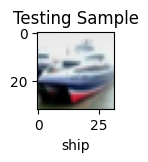

In [17]:
plotingSample(x_test,y_test,1,"Testing Sample")
print(f"the prediction is {classes[y_predLabels[1]]}")

In [19]:
from sklearn.metrics import classification_report
print("Clasification Report \n",classification_report(y_test,y_predLabels))

Clasification Report 
               precision    recall  f1-score   support

           0       0.46      0.82      0.59      1000
           1       0.63      0.77      0.69      1000
           2       0.65      0.31      0.42      1000
           3       0.38      0.23      0.28      1000
           4       0.70      0.23      0.35      1000
           5       0.46      0.62      0.53      1000
           6       0.81      0.40      0.53      1000
           7       0.55      0.66      0.60      1000
           8       0.70      0.66      0.68      1000
           9       0.50      0.81      0.62      1000

    accuracy                           0.55     10000
   macro avg       0.58      0.55      0.53     10000
weighted avg       0.58      0.55      0.53     10000

